# Part 1: comparing tax rates of the 2 groups

in my original project I used a very amature approach to determine if queer communities paid more or fewer taxes comapred to the general population - I did this improperly using data vizualization techniques

//add images

in this section I will attempt to use regression methods to not only determine correlation & comparison - but also to compare insights in other parameters of the groups

In [15]:
# starting out with data cleaning

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

gaybourhoods = pd.read_csv("data/gaybourhoods.csv")
# gaybourhoods.head(5)

## take the dataset & add long/lat
## props to Nat for creating the backbone I used to zipcode -> long/lat

cords = pd.read_csv("data/zip_lat_long.csv")
gaydf = pd.read_csv("data/tax_and_gay.csv")

gaydf = gaydf.merge(cords, left_on="zip", right_on="ZIP")
gaydf = gaydf.rename({
    "LAT": "lat",
    "LNG": "long",
}, axis="columns")
del gaydf['zip.1']
del gaydf['ZIP']

print(gaydf.describe())
print("------------------------------------------------------------------------")
print(gaydf)

                zip     population  gay tax rate  overall tax paid  income  \
count   2184.000000    2184.000000   2184.000000       2184.000000  2184.0   
mean   48935.203297   26691.730769   4373.997253        596.719322     1.0   
std    35451.335807   17960.713867   3054.620840        615.174358     0.0   
min     1730.000000     160.000000      0.000000          0.000000     1.0   
25%    11360.750000   13337.500000   2110.000000        217.000000     1.0   
50%    60023.500000   24070.000000   3900.000000        434.000000     1.0   
75%    80227.250000   35640.000000   5902.500000        777.250000     1.0   
max    98686.000000  114420.000000  24560.000000       9166.000000     1.0   

               lat         long  
count  2184.000000  2184.000000  
mean     38.016518   -91.296804  
std       5.210272    18.476699  
min      25.572213  -123.118977  
25%      33.997027  -105.037767  
50%      39.930150   -87.603617  
75%      40.960828   -74.310179  
max      47.916786   -70.

in the original project I began with a few plots

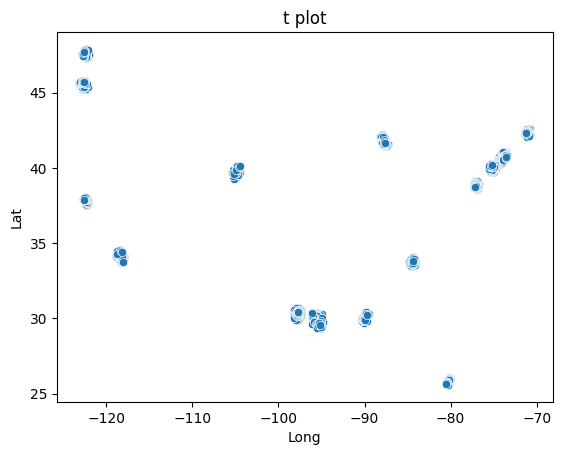

In [16]:
plot1 = sns.scatterplot(data=gaydf, x="long", y="lat")
_ = plot1.set(xlabel="Long", ylabel="Lat", title="t plot")

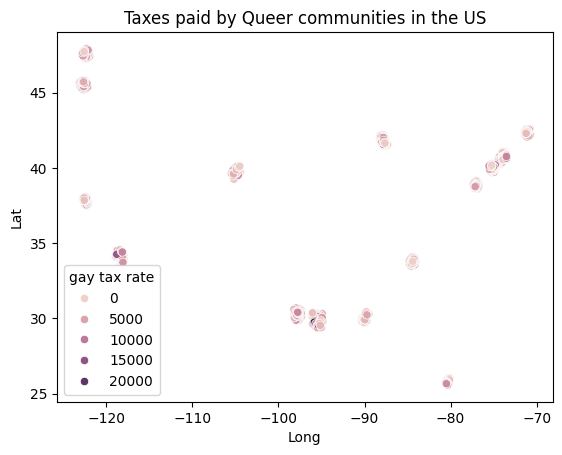

In [17]:
gaydfgaytaxplot = gaydf.copy()

# gaydf.head()

del gaydfgaytaxplot['zip']
del gaydfgaytaxplot['population']
del gaydfgaytaxplot['overall tax paid']
del gaydfgaytaxplot['income']
# del gaydfgaytaxplot['gay tax rate']

plot2 = sns.scatterplot(data=gaydfgaytaxplot, x="long", y="lat", hue='gay tax rate')
_ = plot2.set(xlabel="Long", ylabel="Lat", title="Taxes paid by Queer communities in the US")


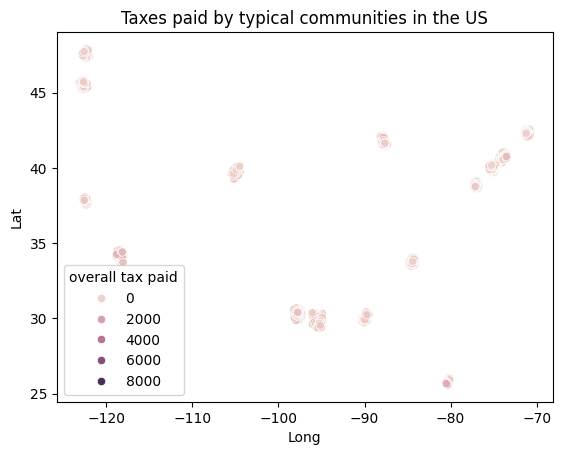

In [7]:
gaydfhybridplot = pd.merge(gaydfgentaxplot, gaydfgaytaxplot)

gaydfhybridplot.describe()

NameError: name 'gaydfgentaxplot' is not defined